<a href="https://colab.research.google.com/github/SurajJadhav-5/Heart_Disease_Prediction_Viz/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
# url = 'https://raw.githubusercontent.com/SurajJadhav-5/Heart_Disease_Prediction_Viz/main/heart.csv?token=AQDS33QXWL3QFIPUVTZHS4LBVLW2A'
# data = pd.read_csv(url)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:

data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# https://www.kaggle.com/chingchunyeh/heart-disease-report
# age
# sex (1 = male; 0 = female)
# cp - chest pain type (4 values)
# trestbps - resting blood pressure
# chol - serum cholestoral in mg/dl
# fbs - fasting blood sugar > 120 mg/dl
# restcg - Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 
#          2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# thalach = maximum heart rate achieved
# exang - exercise induced angina
#         Angina is a type of chest pain caused by reduced blood flow to the heart

# oldpeak = ST depression induced by exercise relative to rest
# slope = the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# ca = number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


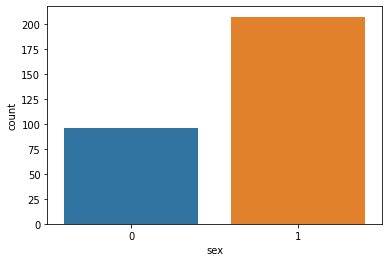

In [8]:
import seaborn as sns

sns.countplot(x = data['sex'], data= data)

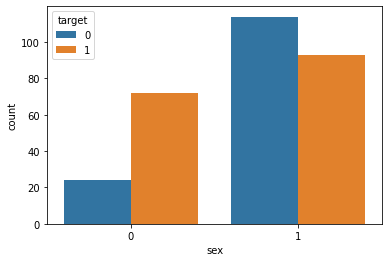

In [9]:
sns.countplot(x = data['sex'], data= data, hue = data['target'])

We can see women tend to have more prob of heart disease more than men.

In [10]:

data['cato_age'] = np.where((data['age'] < 47), 'A', data['age'])
data['cato_age'] = np.where((data['age']>= 47) & (data['age'] < 55), 'B', data['cato_age'])
data['cato_age'] = np.where((data['age']>= 55) & (data['age'] <61) , 'C', data['cato_age'])
data['cato_age'] = np.where(data['age']>=61 , 'D', data['cato_age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


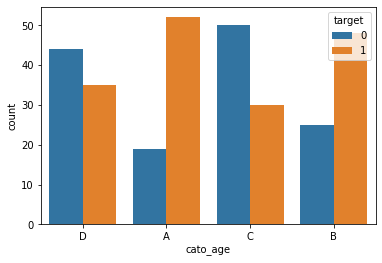

In [11]:
sns.countplot(data['cato_age'], data= data, hue = data['target'])

Age groups are made according to age distributi:on by 25%


1. < 47 = A
2. => 47 & < 55 = B
3. => 55 % < 61 = C
4.   =>61 = D










In [12]:
data['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [13]:
data['cp'].nunique()

4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


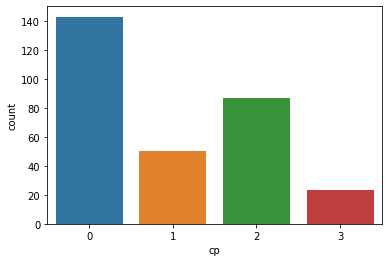

In [14]:
sns.countplot( data['cp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


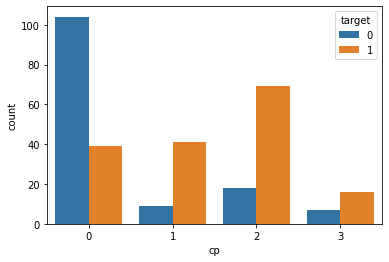

In [15]:
sns.countplot( data['cp'], hue = data['target'])

Chest pain with 1, 2, 3 have more prob of heart disease, unlike chest pain with 0 have less prob

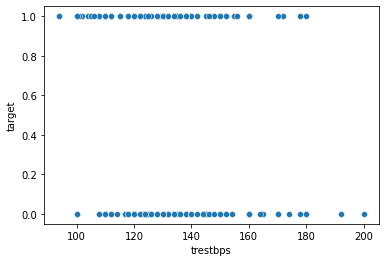

In [16]:
sns.scatterplot(data = data, x = data['trestbps'], y =data['target'])

Any blood pressure may have heart disease

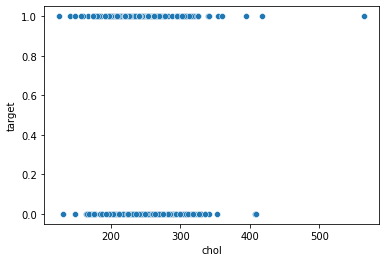

In [17]:
sns.scatterplot(data = data, x = data['chol'], y =data['target'])

Any cholestrol level may have heart disease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


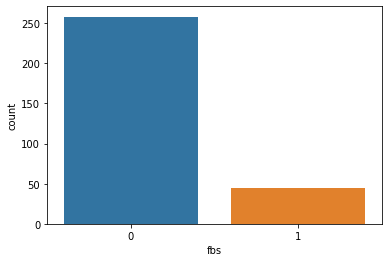

In [18]:
sns.countplot(data['fbs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


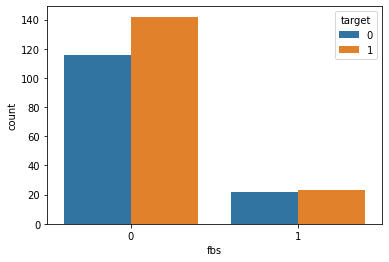

In [19]:
sns.countplot(data['fbs'] , hue = data['target'])

Very less peopple have fasting blood suger more than 120 but nearly half of the people with blood suger less than and more than 120 tend to have the disease.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


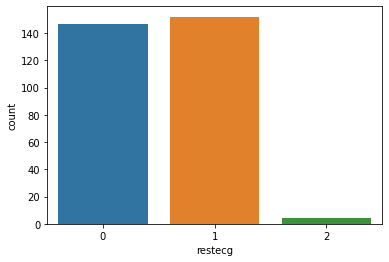

In [20]:
sns.countplot(data['restecg'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


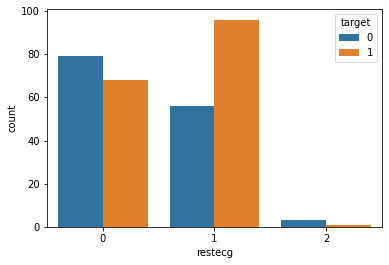

In [21]:
sns.countplot(data['restecg'], hue = data.target)

Electrocardoigraphic measurment shows that half of the people are normal and nearly another half have ST-T wave abmormility. Very less people have another problem. People with normal conditions have same prob of having the disease but with ST-T wave abmormility they have more prob of having the disease.

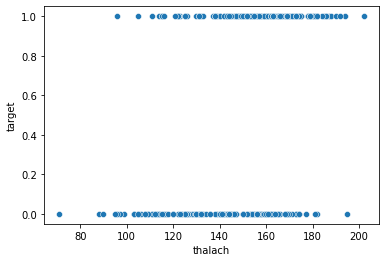

In [22]:
sns.scatterplot(data = data, x = data['thalach'], y = data.target)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


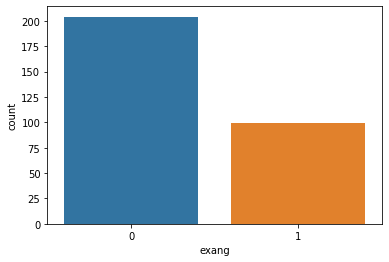

In [23]:
sns.countplot(data.exang)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


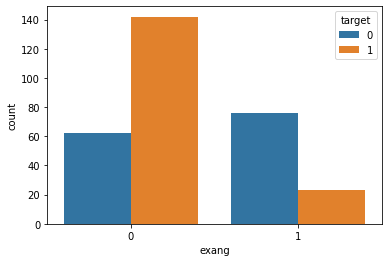

In [24]:
sns.countplot(data.exang, hue  =  data.target)

Those people dont have exercise induced anigma, shoes more prob of having the disease

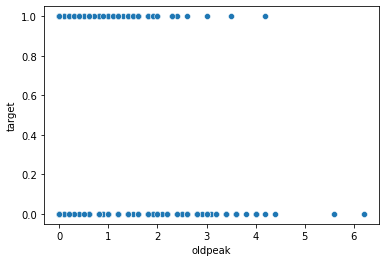

In [25]:
sns.scatterplot(data = data, x= data.oldpeak, y = data.target)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


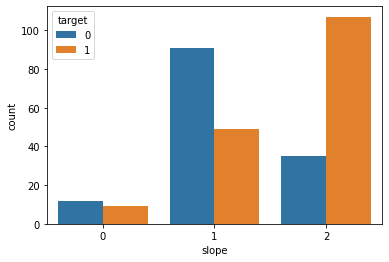

In [26]:
sns.countplot(data.slope, hue = data.target)


People with flat slope have less prob of disease but people with down slope tend to have the heart disease.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


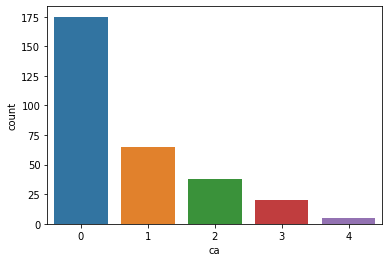

In [27]:
sns.countplot(data.ca)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


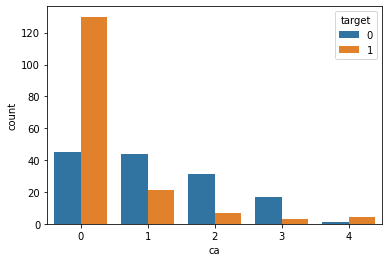

In [28]:
sns.countplot(data.ca, hue= data.target)

didnt understant what is intenstion of giving ca column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


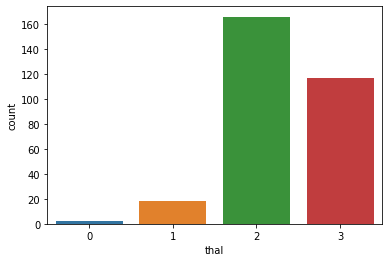

In [29]:
sns.countplot(data.thal)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


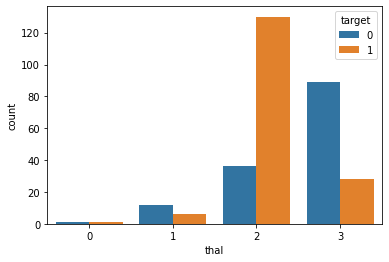

In [30]:
sns.countplot(data.thal, hue = data.target)

People with thalassemia type 2 tend to have more heart disease than other types and type 3 shows less prob of heart disease
* in metadata there is numbering of 3, 6, 7 , have to check numbering order


In [31]:
data = data.drop('cato_age',1)

In [32]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
sns.pairplot(data)

In [ ]:
sns.scatterplot(data.age, data.thalach)

As persons age incerases the maximum heart rate decreases.

In [ ]:
data.head()

In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [ ]:
sns.boxplot(data['trestbps'])

In [ ]:
data['trestbps'][data['trestbps'] > 175].count()

In [ ]:
sns.boxplot(data['chol'])

In [ ]:
data['chol'][data['chol']> 360].count()

In [ ]:
sns.boxplot(data['thalach'])


In [ ]:
data['thalach'][data['thalach'] < 85].count()

In [ ]:
data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].count()

In [ ]:
data = data.drop(data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].index)

Dropped all rows which included  outliers

In [ ]:
data.info()

In [ ]:
sns.distplot(data.age)

In [ ]:
sns.distplot(data.trestbps)

In [ ]:
sns.distplot(data.thalach)

In [ ]:
sns.distplot(data.chol)

In [ ]:
sns.distplot(data.oldpeak)

In [ ]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
corrmat

No two variables are highly related so we can say that all variables are independent of each other.

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = data['target']

In [ ]:
X = data[columns]
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
logreg.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [ ]:
cm

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
data.head()

In [ ]:
from sklearn.compose import ColumnTransformer
mm = MinMaxScaler()
minmax = ColumnTransformer([
          ("MinMaxScaler", mm, ['trestbps', 'chol', 'thalach'])], remainder= "passthrough")


In [ ]:
minmax.fit(data)

In [ ]:
data_trans = minmax.transform(data)

In [ ]:
pd.DataFrame(data_trans).head()

In [ ]:
data_trans = pd.DataFrame(data_trans, columns=['trestbps', 'chol', 'thalach', 'age', 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [ ]:
data_trans.head()


In [ ]:
data_trans.info()


In [ ]:
X = data_trans[columns]
y = data_trans['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train



In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [ ]:
logreg.score(X_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)